In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle


### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class="tocSkip"></a>

# Lidt Sjov <a class="tocSkip"></a>
## Med Python <a class="tocSkip"></a>
## Version 0.2 - oktober 2019 (Dansk) <a class="tocSkip"></a>

> Her er lidt sjov med Python

### Niels Bohr Institutet <a class="tocSkip"></a>

### Christian Holm Christensen <a class="tocSkip"></a>

# A little Fun <a class="tocSkip"></a>
## With Python <a class="tocSkip"></a>
## Version 0.2 - October 2019 (English) <a class="tocSkip"></a>

> Here's a little fun with Python

### Niels Bohr Institute <a class="tocSkip"></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

# Optimering af tid

Her er nogle instruktive grafer over sammenhængen mellem karakter og diverse aktiviteter.  Vi bruger stilen `xkcd` inspireret af strippen [XKCD](https://xkcd.com/) - bare fordi vi kan.  

# Optimization of time

Here are some instructive graphs of the connection between grades and various activities. We use the `xkcd` style inspired by the comic [XKCD](https://xkcd.com/) - just because we can.

In [3]:
def fixupPlot(axes,title='',xlabel='',ylabel='',legend=None,xticks=False,yticks=False):
    if axes is None:
        raise RuntimeError("No axes passed")
        
    if xlabel is not None: axes.set_xlabel(xlabel.upper())
    if ylabel is not None: axes.set_ylabel(ylabel.upper())
    if title  is not None: axes.set_title(title.upper())
    axes.spines['right'].set_color('none')
    axes.spines['top'].set_color('none')
    if not xticks: axes.set_xticks([])
    if not yticks: axes.set_yticks([])
    if legend is not None:
        for t in legend.get_texts():
            t.set_text(t.get_text().upper())

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS', 'StayPuft'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS', 'StayPuft'] not found. Falling back to DejaVu Sans.


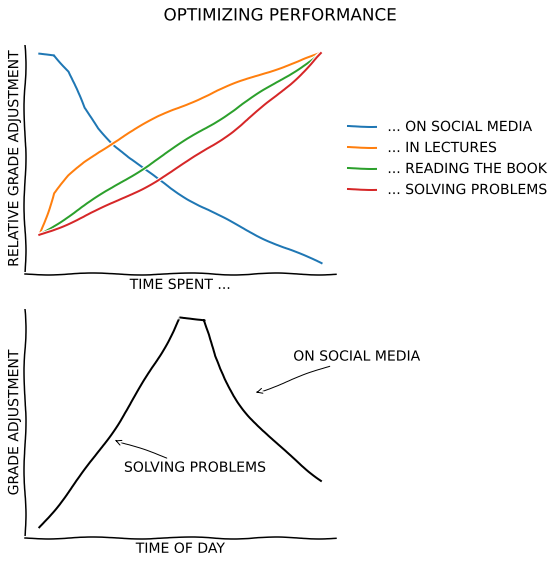

In [4]:
def effectsOnGrades():
    def social(t,a=.1,cut=.1):
        return np.array([1-a*tt if tt < cut else 1-a*cut - ((1-a*cut)/(1-cut))**2*np.sqrt(tt-cut) 
                for tt in np.asarray(t)])

    def lectures(t):
        return np.sqrt(t)

    def study(t):
        return t;

    def exercises(t):
        return (np.exp(t)-1)/(np.exp(1)-1)

    with plt.xkcd():
        fig, ax = plt.subplots(nrows=2,figsize=(8,8))
        t = np.linspace(0,1,20)
        ax[0].plot(t,social(t),label='... ON SOCIAL MEDIA')
        ax[0].plot(t,lectures(t),label='... IN LECTURES')
        ax[0].plot(t,study(t),label='... READING THE BOOK')
        ax[0].plot(t,exercises(t),label='... SOLVING PROBLEMS')
        leg = ax[0].legend(loc='center left',bbox_to_anchor=(1,0,1.5,1),frameon=False)
        fixupPlot(ax[0],None,'TIME SPENT ...','RELATIVE GRADE ADJUSTMENT',leg)
        
        
        et = .5
        ef = exercises(et)
        t = np.linspace(0,et,30)
        ax[1].plot(t,exercises(t),'k')
        ax[1].plot(t+et,ef*social(t),'k')
        fixupPlot(ax[1],None,'time of day','grade adjustment')
        ax[1].annotate('SOLVING PROBLEMS',xy=(.26,exercises([.24])),
                 xytext=(.3,.1),arrowprops=dict(arrowstyle='->'))
        ax[1].annotate('ON SOCIAL MEDIA',xy=(et+.26,ef*exercises([et+.24])),
                 xytext=(.9,.3),arrowprops=dict(arrowstyle='->'))
        
        fig.suptitle('OPTIMIZING PERFORMANCE')
        plt.tight_layout()
        plt.show()
        
effectsOnGrades()

# De ord vi slynger om os

# The words we throw around

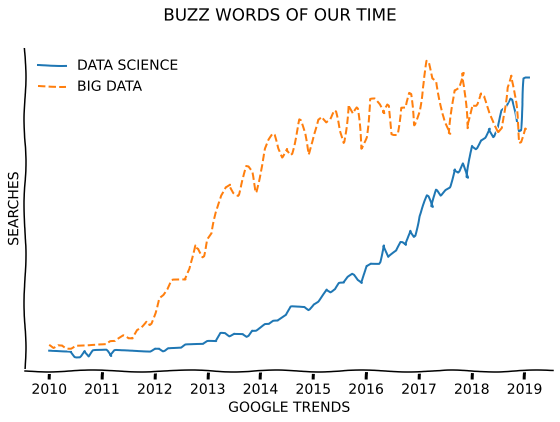

In [5]:
def buzzWords():
    
    with open('DataScienceVsBigData.csv') as file:
        data = np.genfromtxt(file,skip_header=3,delimiter=',',
                             dtype=[('date','datetime64[s]'),('ds','i'),('bd','i')])
    
    with plt.xkcd():
        fig, ax = plt.subplots(figsize=(8,6))
        ax.plot(data['date'],data['ds'],'-',label='Data Science')
        ax.plot(data['date'],data['bd'],'--',label='Big Data')
        leg = ax.legend(frameon=False)
        fig.suptitle('Buzz words of our time'.upper())
        fixupPlot(ax,None,'Google trends','Searches',leg,xticks=True)
        plt.tight_layout()
        
buzzWords()

# Tilbage til den mørke middelalder 

# Back to the Dark Ages

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS', 'StayPuft'] not found. Falling back to DejaVu Sans.


interactive(children=(IntSlider(value=30, description='max', max=261, min=10, step=10), Output()), _dom_classe…

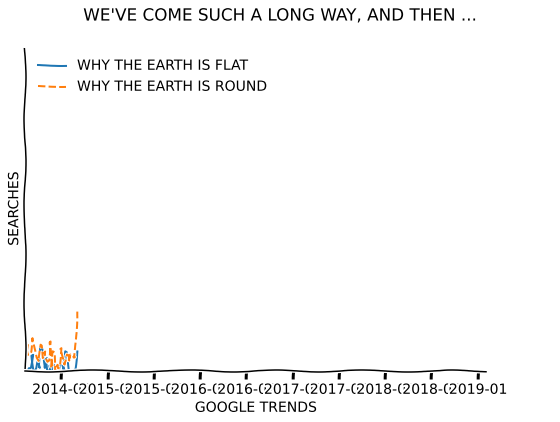

In [6]:
import datetime

def weHaveComeSoFar():
    
    with open('FlatVsRoundEarth.csv') as file:
        data = np.genfromtxt(file,skip_header=3,delimiter=',',
                             dtype=[('date','datetime64[s]'),('flat','i'),('round','i')])
    start = 30
    cut = 200
    with plt.xkcd():
        fig, ax = plt.subplots(figsize=(8,6))
        flat,  = ax.plot(data['date'][:start],data['flat'][:start],"-",label='Why the earth is flat')
        round, = ax.plot(data['date'][:start],data['round'][:start],"--",label='Why the earth is round')
        annot  = ax.annotate('argh!'.upper(),
                             xy=(data['date'][cut-10],(data['flat'][cut-10]+data['round'][cut-10])/2),
                             xytext=(data['date'][-1]+50,30),
                             arrowprops=dict(arrowstyle='->'),
                             fontsize='x-large',
                             color='white')
        ax.set_xlim(data['date'][0],data['date'][-1])
        ymin, ymax = data['round'].min(),data['flat'].max()
        ax.set_ylim(ymin,ymax)
        leg = ax.legend(loc='upper left',frameon=False)
        fig.suptitle('We\'ve come such a long way, and then ...'.upper())
        fixupPlot(ax,None,'Google trends','Searches',leg,xticks=True)
        plt.tight_layout()
            
        @interact(max=(10,len(data),10))
        def plot(max=30):
            print("Plotting to ",max)
            flat .set_data(data['date'][:max],data['flat'][:max])
            round.set_data(data['date'][:max],data['round'][:max])
            annot.arrow_patch.set_color('white')
            annot.set_color('white')
            if max >= cut:
                annot.arrow_patch.set_color('black')
                annot.set_color('black')
           
     
        
weHaveComeSoFar()